Importing the Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Load and clean data
file_path = '389b9665-cb4d-4e56-9da6-314967f4e59b_Data.csv'

selected_columns = [
    "Series Name", "Country Name",
    "2018 [YR2018]", "2019 [YR2019]",
    "2020 [YR2020]", "2021 [YR2021]",
    "2022 [YR2022]"
]

data = pd.read_csv(file_path)

data = data[selected_columns]

data.replace('..', np.nan, inplace=True)

for col in data.columns[2:]:
    data[col] = pd.to_numeric(data[col], errors='coerce')

data.dropna(inplace=True)


In [7]:
# Define metrics and years
metrics = [
    "Adolescent fertility rate (births per 1,000 women ages 15-19)",
    "Age dependency ratio (% of working-age population)"
]
years = ["2018 [YR2018]", "2019 [YR2019]", "2020 [YR2020]", "2021 [YR2021]", "2022 [YR2022]"]


In [8]:
# normalize the data
subset_data = data[data["Series Name"].isin(metrics)]
pivoted_data = subset_data.pivot(index="Country Name", columns="Series Name", values=years).dropna()
scaler = StandardScaler()
normalized_data = scaler.fit_transform(pivoted_data)



In [21]:
stacked_data = pivoted_data.stack(level=0).reset_index()
stacked_data = stacked_data.drop(columns=[''])
stacked_data.columns = [
    'Country Name', 'Year',
    'Adolescent fertility rate (births per 1,000 women ages 15-19)',
    'Age dependency ratio (% of working-age population)'
]


<ipython-input-21-3b888773f7d8>:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  stacked_data = pivoted_data.stack(level=0).reset_index()


## EDA

<ipython-input-23-70fd757494ca>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Year', y='Fertility Rate', data=stacked_data, palette="Set2")


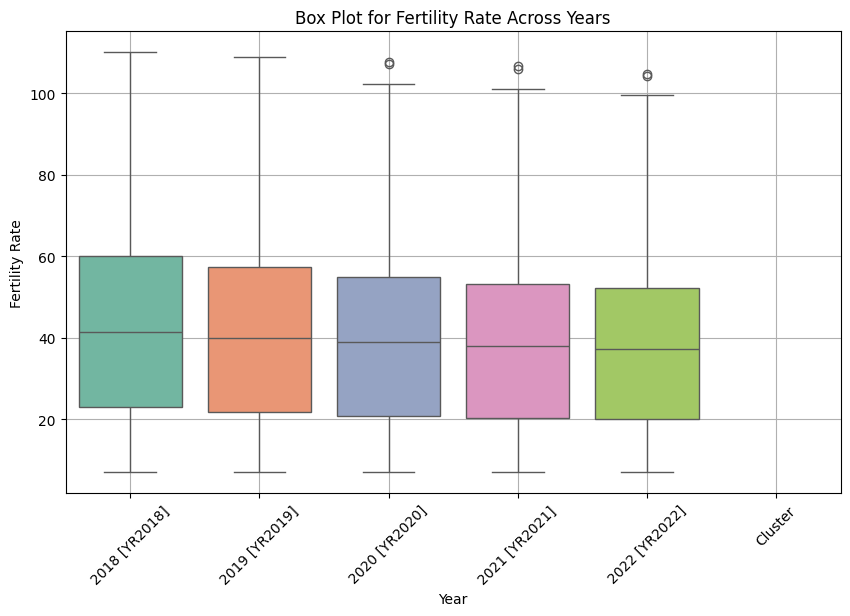

In [23]:
# Box plot function

def plot_box_plot(stacked_data):

    """Plot a box plot for 'Fertility Rate' across years."""

    stacked_data = stacked_data.rename(columns={
        "Adolescent fertility rate (births per 1,000 women ages 15-19)": "Fertility Rate"
    })
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Year', y='Fertility Rate', data=stacked_data, palette="Set2")
    plt.title('Box Plot for Fertility Rate Across Years')
    plt.xlabel('Year')
    plt.ylabel('Fertility Rate')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

plot_box_plot(stacked_data)


<ipython-input-24-dd91b50ff0cf>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Year', y='Dependency Ratio', data=stacked_data, palette="muted")


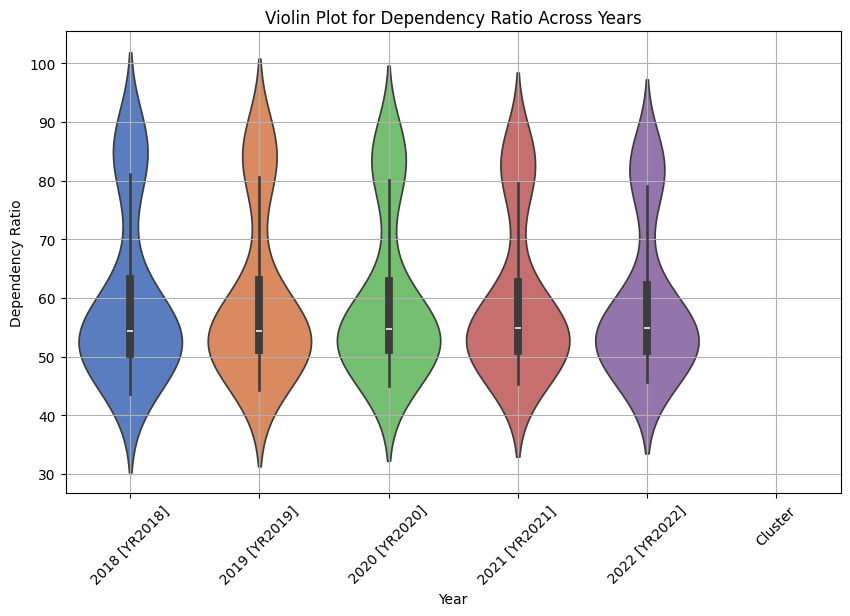

In [24]:
# Violin plot function

def plot_violin_plot(stacked_data):

    """Plot a violin plot for 'Dependency Ratio' across years."""

    stacked_data = stacked_data.rename(columns={
        "Age dependency ratio (% of working-age population)": "Dependency Ratio"
    })
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='Year', y='Dependency Ratio', data=stacked_data, palette="muted")
    plt.title('Violin Plot for Dependency Ratio Across Years')
    plt.xlabel('Year')
    plt.ylabel('Dependency Ratio')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

plot_violin_plot(stacked_data)

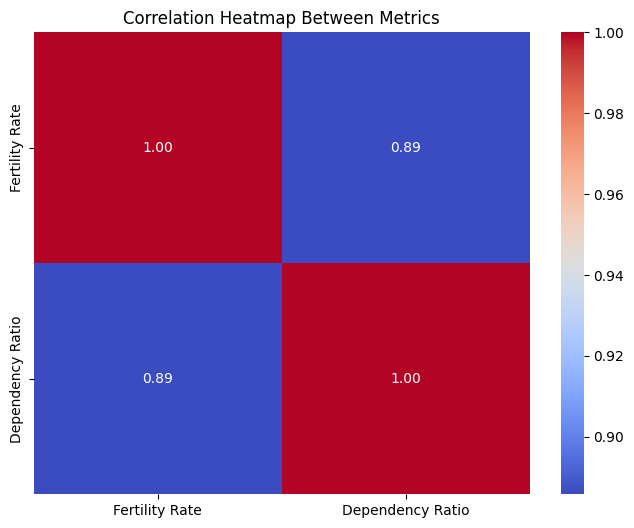

In [25]:
# Correlation heatmap function

def plot_correlation_heatmap(stacked_data):

    """Plot a correlation heatmap between 'Fertility Rate' and 'Dependency Ratio'."""

    stacked_data = stacked_data.rename(columns={
        "Adolescent fertility rate (births per 1,000 women ages 15-19)": "Fertility Rate",
        "Age dependency ratio (% of working-age population)": "Dependency Ratio"
    })
    metrics_correlation = stacked_data.drop(columns=['Country Name', 'Year']).corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(metrics_correlation, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap Between Metrics')
    plt.show()


plot_correlation_heatmap(stacked_data)

### Elbow plot

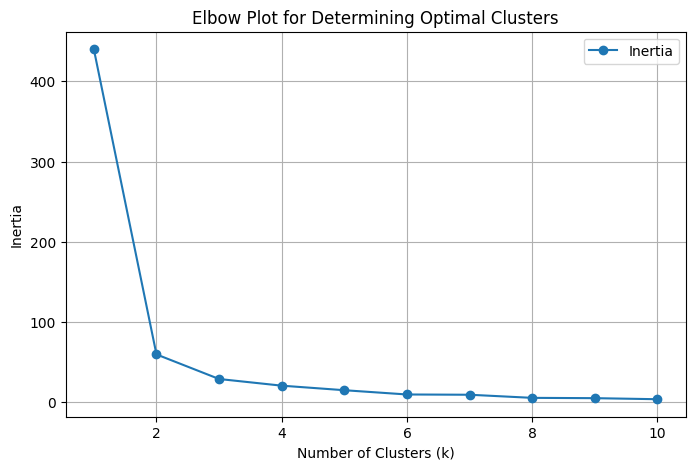

In [26]:
# Elbow plot function

def elbow_plot(data):

    """Create an elbow plot to determine the optimal number of clusters."""

    inertia = []
    k_range = range(1, 11)
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(8, 5))
    plt.plot(k_range, inertia, marker='o', label="Inertia")
    plt.title('Elbow Plot for Determining Optimal Clusters')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.legend()
    plt.grid(True)
    plt.show()


elbow_plot(normalized_data)


In [27]:
optimal_k = 3

## Clustering

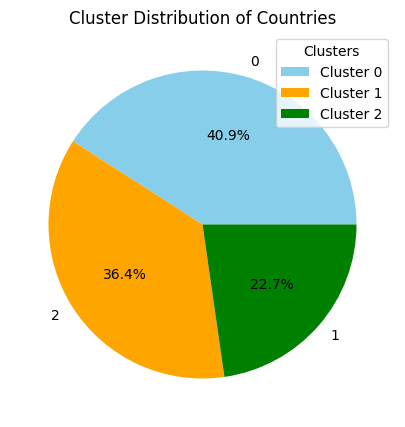

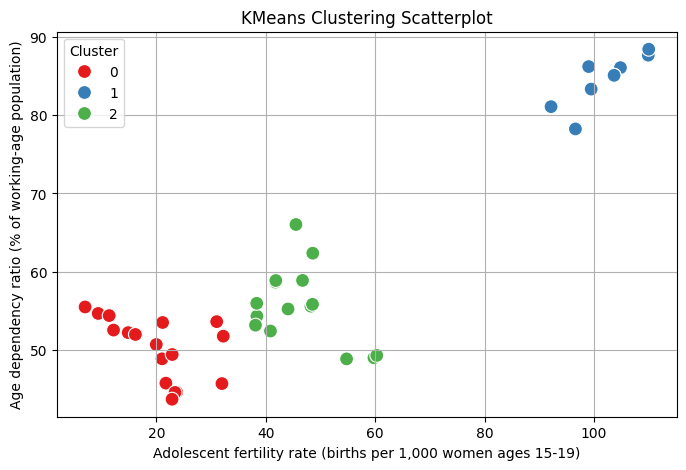

In [28]:
# Clustering function

def perform_clustering(data, optimal_k, pivoted_data, metrics):

    """Perform k-means clustering and visualize clusters using a scatterplot."""

    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    clusters = kmeans.fit_predict(data)
    pivoted_data['Cluster'] = clusters

    # Pie chart for cluster distribution
    plt.figure(figsize=(8, 5))
    pivoted_data['Cluster'].value_counts().plot(
        kind='pie', autopct='%1.1f%%', colors=['skyblue', 'orange', 'green']
    )
    plt.title('Cluster Distribution of Countries')
    plt.ylabel('')
    plt.legend(labels=[f'Cluster {i}' for i in range(optimal_k)], title="Clusters")
    plt.show()

    # Scatterplot for clustering
    plt.figure(figsize=(8, 5))
    sns.scatterplot(
        x=pivoted_data[(years[0], metrics[0])],
        y=pivoted_data[(years[0], metrics[1])],
        hue=pivoted_data['Cluster'],
        palette='Set1',
        s=100
    )
    plt.title('KMeans Clustering Scatterplot')
    plt.xlabel(metrics[0])
    plt.ylabel(metrics[1])
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.show()


perform_clustering(normalized_data, optimal_k, pivoted_data, metrics)


## Linear Fitting

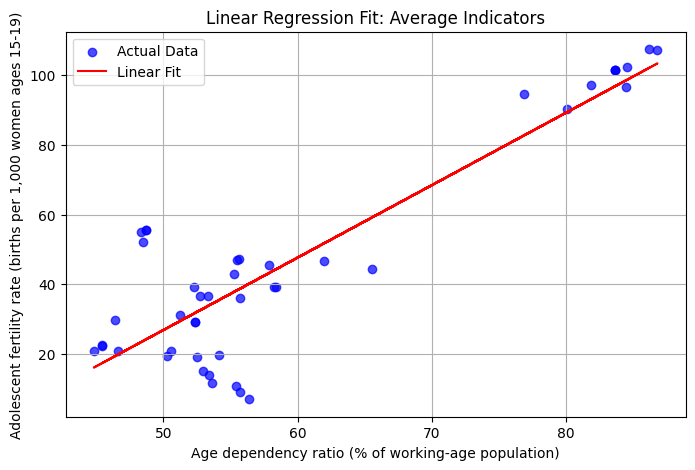

Mean Squared Error: 211.62


In [29]:
# Linear regression fitting function

def linear_fit_analysis(pivoted_data):
    """Perform linear regression fitting on combined years."""
    x = pivoted_data.xs(metrics[1], level="Series Name", axis=1).mean(axis=1).values.reshape(-1, 1)
    y = pivoted_data.xs(metrics[0], level="Series Name", axis=1).mean(axis=1).values

    linear_model = LinearRegression()
    linear_model.fit(x, y)
    y_pred = linear_model.predict(x)

    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, color='blue', alpha=0.7, label='Actual Data')
    plt.plot(x, y_pred, color='red', label='Linear Fit')
    plt.title('Linear Regression Fit: Average Indicators')
    plt.xlabel(metrics[1])
    plt.ylabel(metrics[0])
    plt.legend()
    plt.grid(True)
    plt.show()

    mse = mean_squared_error(y, y_pred)
    print(f"Mean Squared Error: {mse:.2f}")

linear_fit_analysis(pivoted_data)



<Figure size 800x600 with 0 Axes>

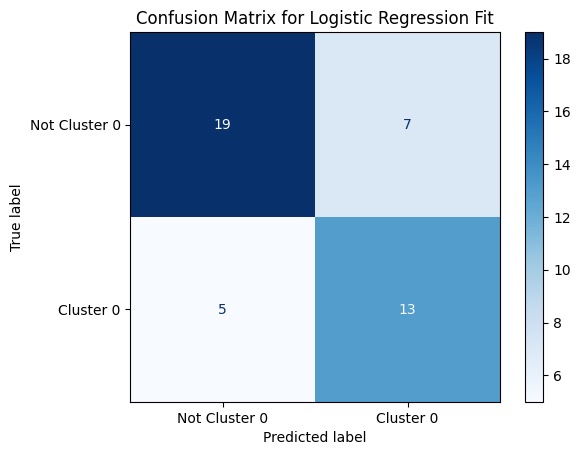

In [30]:
# Logistic regression confusion matrix function
def regression_confusion_matrix(pivoted_data):
    """Perform logistic regression and plot a confusion matrix based on predictions."""
    x = pivoted_data.xs(metrics[1], level="Series Name", axis=1).mean(axis=1).values.reshape(-1, 1)
    y = (pivoted_data['Cluster'] == 0).astype(int)

    logistic_model = LogisticRegression(random_state=42)
    logistic_model.fit(x, y)
    y_pred = logistic_model.predict(x)

    conf_matrix = confusion_matrix(y, y_pred)
    plt.figure(figsize=(8, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Not Cluster 0", "Cluster 0"])
    disp.plot(cmap="Blues", values_format="d")
    plt.title("Confusion Matrix for Logistic Regression Fit")
    plt.show()

regression_confusion_matrix(pivoted_data)

